# <p style="text-align: center;">Регрессионный анализ</p>

## Задание:

- Загрузите данные, проверьте правильность, наличие пропущенных значений, типы данных.
- Создайте новый признак – марку автомобиля (company). Машины каких производителей встречаются в датасете? Далее исправьте  названия и проверьте изменения.
- Оставьте только часть предикторов, после чего посчитайте корреляцию между price и другими переменными.
- Преобразуйте категориальные переменные с помощью pd.get_dummies(). 
- Постройте модель с одним предиктором цены – horsepower. Какой процент изменчивости объясняет полученная модель? (\(R^2\))
- Далее – две модели (со всеми предикторами и со всеми, кроме марок машин). Обратите внимание на изменения в \(R^2\),  коэффициентах и их значимости. Какую модель лучше оставить? 
- Заполните пропуски в результатах.

---

## Загрузите данные, проверьте правильность, наличие пропущенных значений, типы данных.

In [1]:
# Импортируем библиотеки

import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
df = pd.read_csv('cars.csv')
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [3]:
df.shape

(205, 26)

In [4]:
df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [5]:
df.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [6]:
df.duplicated().sum()

0

---

## Создайте новый признак – марку автомобиля (company). Машины каких производителей встречаются в датасете? Далее исправьте названия и проверьте изменения.

Сгенерируем новый признак.

Использовать полное название машины – не самый хороший вариант, поэтому создадим новый признак – марку автомобиля (company).

In [7]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [8]:
df['company'] = df['CarName'].apply(lambda x: x.split(' ')[0])

In [9]:
df['company'].nunique()

28

In [10]:
df['company'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

Видно, что есть ошибки в названиях. Исправим их и после удалим поля CarName и car_ID. Они не пригодятся.

In [11]:
df['company'] = df['company'].str.lower().replace({'maxda' : 'mazda',
                                                  'porcshce' : 'porsche',
                                                  'toyouta' : 'toyota',
                                                  'vokswagen' : 'volkswagen',
                                                    'vw' : 'volkswagen'})

In [12]:
df['company'].nunique()

22

In [13]:
df['company'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [14]:
df = df.drop(columns=['car_ID', 'CarName'])

In [15]:
df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


## Оставьте только часть предикторов, после чего посчитайте корреляцию между price и другими переменными.

Чтобы не перегружать модель большим количеством предикторов, оставим только часть из них.

In [16]:
small_df = df[['company',
             'fueltype', 
             'aspiration',
             'carbody', 
             'drivewheel', 
             'wheelbase', 
             'carlength',
             'carwidth', 
             'curbweight', 
             'enginetype', 
             'cylindernumber', 
             'enginesize', 
             'boreratio',
             'horsepower',
             'price']]

In [17]:
small_df

,company,fueltype,aspiration,carbody,drivewheel,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,price
0,alfa-romero,gas,std,convertible,rwd,88.6,168.8,64.1,2548,dohc,four,130,3.47,111,13495.0
1,alfa-romero,gas,std,convertible,rwd,88.6,168.8,64.1,2548,dohc,four,130,3.47,111,16500.0
2,alfa-romero,gas,std,hatchback,rwd,94.5,171.2,65.5,2823,ohcv,six,152,2.68,154,16500.0
3,audi,gas,std,sedan,fwd,99.8,176.6,66.2,2337,ohc,four,109,3.19,102,13950.0
4,audi,gas,std,sedan,4wd,99.4,176.6,66.4,2824,ohc,five,136,3.19,115,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,volvo,gas,std,sedan,rwd,109.1,188.8,68.9,2952,ohc,four,141,3.78,114,16845.0
201,volvo,gas,turbo,sedan,rwd,109.1,188.8,68.8,3049,ohc,four,141,3.78,160,19045.0
202,volvo,gas,std,sedan,rwd,109.1,188.8,68.9,3012,ohcv,six,173,3.58,134,21485.0
203,volvo,diesel,turbo,sedan,rwd,109.1,188.8,68.9,3217,ohc,six,145,3.01,106,22470.0


Посчитаем корреляцию между переменными.

In [18]:
small_df.corr()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,price
wheelbase,1.000000,0.874587,0.795144,0.776386,0.569329,0.488750,0.353294,0.577816
carlength,0.874587,1.000000,0.841118,0.877728,0.683360,0.606454,0.552623,0.682920
carwidth,0.795144,0.841118,1.000000,0.867032,0.735433,0.559150,0.640732,0.759325
curbweight,0.776386,0.877728,0.867032,1.000000,0.850594,0.648480,0.750739,0.835305
enginesize,0.569329,0.683360,0.735433,0.850594,1.000000,0.583774,0.809769,0.874145
boreratio,0.488750,0.606454,0.559150,0.648480,0.583774,1.000000,0.573677,0.553173
horsepower,0.353294,0.552623,0.640732,0.750739,0.809769,0.573677,1.000000,0.808139
price,0.577816,0.682920,0.759325,0.835305,0.874145,0.553173,0.808139,1.000000


Линейная регрессия в python не справляется с категориальными переменными (типом object в pandas), поэтому применим функцию под названием pd.get_dummies(). Она создаёт фиктивные переменные на основе изначальных категорий, представленные в виде 0 и 1.

In [19]:
small_df.dtypes

company            object
fueltype           object
aspiration         object
carbody            object
drivewheel         object
wheelbase         float64
carlength         float64
carwidth          float64
curbweight          int64
enginetype         object
cylindernumber     object
enginesize          int64
boreratio         float64
horsepower          int64
price             float64
dtype: object

In [20]:
df_dummy = pd.get_dummies(data=small_df, drop_first = True)

In [21]:
df_dummy

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,price,company_audi,company_bmw,...,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
0,88.6,168.8,64.1,2548,130,3.47,111,13495.0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,88.6,168.8,64.1,2548,130,3.47,111,16500.0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,94.5,171.2,65.5,2823,152,2.68,154,16500.0,0,0,...,0,0,1,0,0,0,1,0,0,0
3,99.8,176.6,66.2,2337,109,3.19,102,13950.0,1,0,...,1,0,0,0,0,1,0,0,0,0
4,99.4,176.6,66.4,2824,136,3.19,115,17450.0,1,0,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,109.1,188.8,68.9,2952,141,3.78,114,16845.0,0,0,...,1,0,0,0,0,1,0,0,0,0
201,109.1,188.8,68.8,3049,141,3.78,160,19045.0,0,0,...,1,0,0,0,0,1,0,0,0,0
202,109.1,188.8,68.9,3012,173,3.58,134,21485.0,0,0,...,0,0,1,0,0,0,1,0,0,0
203,109.1,188.8,68.9,3217,145,3.01,106,22470.0,0,0,...,1,0,0,0,0,0,1,0,0,0


Сначала построим небольшую модель всего с одним предиктором цены (price) – horsepower.

In [22]:
res = smf.ols('price ~ horsepower', data=df_dummy).fit()

In [29]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     382.2
Date:                Thu, 10 Nov 2022   Prob (F-statistic):           1.48e-48
Time:                        22:38:13   Log-Likelihood:                -2024.0
No. Observations:                 205   AIC:                             4052.
Df Residuals:                     203   BIC:                             4059.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3721.7615    929.849     -4.003      0.0

Построим график.

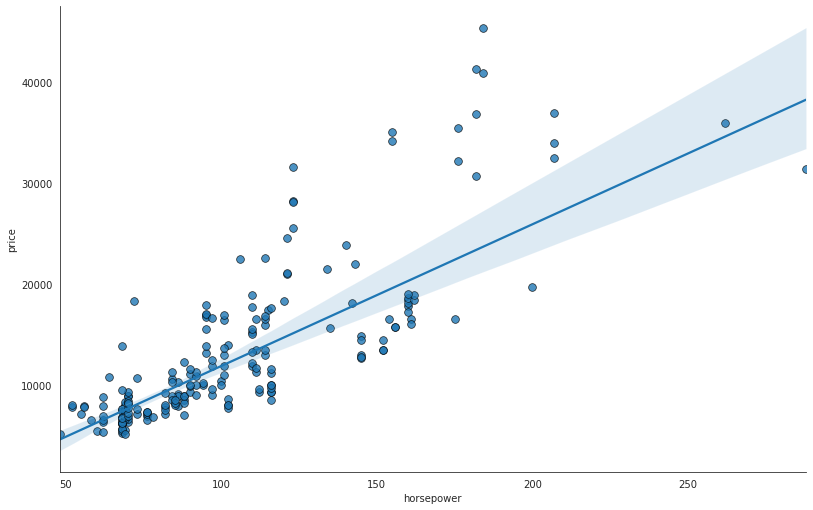

In [34]:
sns.set_style("white")
gridobj = sns.lmplot(x="horsepower", y="price", data=df_dummy, 
                     height=7, aspect=1.6, robust=True, palette='tab10', 
                     scatter_kws=dict(s=60, linewidths=.7, edgecolors='black'))

plt.show()

Теперь построим ещё две модели:

- модель со всеми предикторами
- модель со всеми предикторами, кроме марок машин

Попробуем выбрать из этих моделей самую удачную.

In [24]:
x_with_comp = sm.add_constant(df_dummy.drop(columns=['price']))
y_with_comp = df_dummy['price']
model_with_comp = sm.OLS(y_with_comp, x_with_comp)
print(model_with_comp.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     81.09
Date:                Thu, 10 Nov 2022   Prob (F-statistic):           4.86e-89
Time:                        22:37:38   Log-Likelihood:                -1804.2
No. Observations:                 205   AIC:                             3702.
Df Residuals:                     158   BIC:                             3858.
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -3.472e+

In [25]:
x_without_comp = sm.add_constant(df_dummy[[i for i in df_dummy.columns if i.startswith('company')==False]] \
                                 .drop(columns=['price']))
y_without_comp = df_dummy['price']
model_without_comp = sm.OLS(y_without_comp, x_without_comp)
print(model_without_comp.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     72.32
Date:                Thu, 10 Nov 2022   Prob (F-statistic):           9.86e-81
Time:                        22:37:39   Log-Likelihood:                -1881.6
No. Observations:                 205   AIC:                             3817.
Df Residuals:                     178   BIC:                             3907.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -1.7e+

Хотя марки машин и объясняют какую-то часть общей дисперсии в данных, эта часть не самая большая - около 4%. На фоне того, как эта переменная усложняет модель дополнительными статнезначимыми коэффициентами, мы можем принять решение выкинуть её из модели либо дополнительно переделать. Однозначно правильного решения тут нет.

### Вывод  
Выбранная модель объясняет примерно 90% дисперсии. Среди предикторов 10 из 27 оказались не значимыми (p > 0.05). Пример интерпретации: при единичном увеличении показателя horsepower, цена возрастаетТ на 86.8164.